# workflow for processing a single WAV file into MSEED and event CSV and making plots

19 Trace(s) in Stream:
MV.MBRY..BHZ | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBRY..BHN | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBRY..BHE | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBSS..SHZ | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBBY..BHZ | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBBY..BHN | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBBY..BHE | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBGH..BHZ | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBGH..BHN | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBGH..BHE | 2001-03-07T02:20:45.040000Z - 1901-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBWH

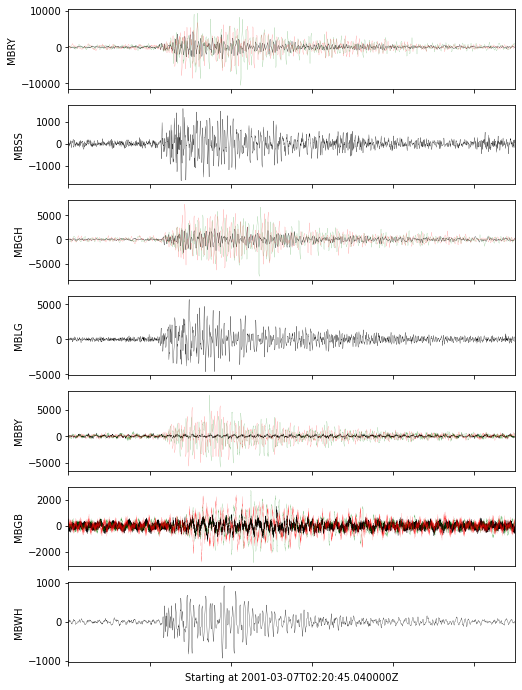

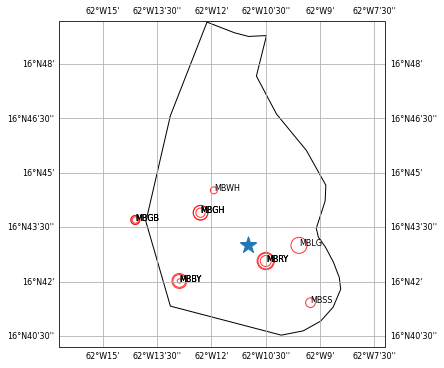

15 Trace(s) in Stream:
MV.MBRY..BHZ | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBRY..BHN | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBRY..BHE | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBSS..SHZ | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBBY..BHZ | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBBY..BHN | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBBY..BHE | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBGH..BHZ | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBGH..BHN | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBGH..BHE | 2001-03-07T02:20:45.040000Z - 2001-03-07T02:21:40.026667Z | 75.0 Hz, 4125 samples
MV.MBWH

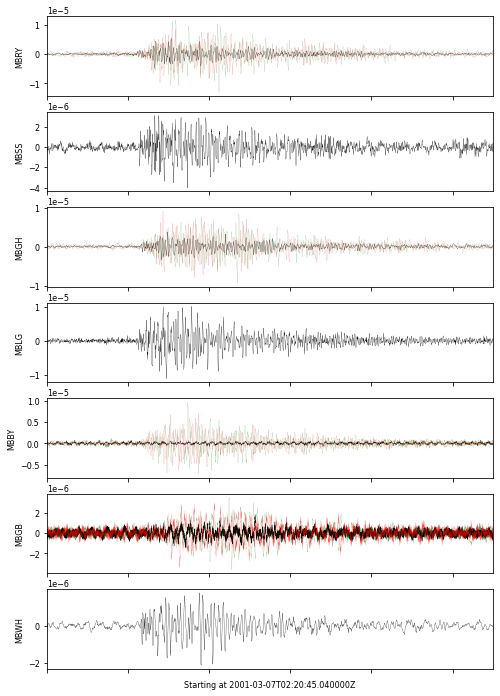

In [1]:
import os, sys
import pandas as pd
from obspy.core import read, Stream
LIBpath = os.path.join( os.getenv('HOME'),'src','kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
from libMVO import read_monty_wavfile_and_correct_traceIDs, enhance_stream, save_enhanced_stream, \
    metrics2df, read_enhanced_stream, plot_station_amplitude_map, parse_STATION0HYP, add_station_locations
from libseisGT import plot_seismograms 
 
SEISAN_DATA = os.path.join( os.getenv('HOME'),'DATA','MVO') # e.g. /home/user/seismo
SEISAN_DB = 'MVOE_'
station0hypfile = os.path.join(SEISAN_DATA, 'DAT', 'STATION0_MVO.HYP')
station_locationsDF = parse_STATION0HYP(station0hypfile) 

wavpath = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2001/03/2001-03-07-0220-45S.MVO___019')
wavbase = os.path.basename(wavpath)
CALDIR = os.path.join(SEISAN_DATA, 'CAL')

raw_st = read_monty_wavfile_and_correct_traceIDs(wavpath, bool_ASN=False)
add_station_locations(raw_st, station_locationsDF)
print(raw_st)

uncorrected_st = enhance_stream(raw_st)
print(uncorrected_st)
uncorrected_df = metrics2df(uncorrected_st)
save_enhanced_stream(uncorrected_st, uncorrected_df, wavbase + '.uncorrected', save_pickle=True)
plot_seismograms(uncorrected_st, outfile='uncorrected_seismograms.png')

corrected_st = enhance_stream(raw_st, CALDIR)
corrected_df = metrics2df(corrected_st)
print(corrected_st)
save_enhanced_stream(corrected_st, corrected_df, wavbase + '.corrected', save_pickle=True)
plot_station_amplitude_map(corrected_st, station0hypfile=station0hypfile)
plot_seismograms(corrected_st, outfile='corrected_seismograms.png')

# Workflow for checking I can reconstruct from MiniSEED and CSV file
corrected_st2 = read_enhanced_stream(wavbase + '.corrected')
print(corrected_st2)
corrected_df2 = metrics2df(corrected_st2)
save_enhanced_stream(corrected_st2, corrected_df2, wavbase + 'corrected2', save_pickle=True)

print(corrected_df2)

# The Montserrat station magnitude scales, reborn (needs calibrating)

In [ ]:
from obspy.geodetics import locations2degrees, degrees2kilometers
from metrics import Mlrichter, Eseismic_Boatwright, Eseismic2magnitude, compute_stationEnergy
dome_lat = 16.7166638
dome_lon = -62.1833326 

mag_df = corrected_df
mag_df['R'] = degrees2kilometers(locations2degrees(mag_df['lat'], mag_df['lon'], dome_lat, dome_lon))*1000.0
mag_df['magA'] = Mlrichter(mag_df['peakamp'], R=mag_df['R']) 
mag_df['Eseismic'] = Eseismic_Boatwright(mag_df['energy'], R=mag_df['R'])
mag_df['magE'] = Eseismic2magnitude(mag_df['Eseismic'])
for i,row in mag_df.iterrows():
    if row['units']!='m/s':
        mag_df.loc[i,'magA'] = None
        mag_df.loc[i,'Eseismic'] = None
        mag_df.loc[i,'magE'] = None
print(mag_df)

# These stats can be used for network magnitudes
mag_df[['magA','magE']].describe()

# Need to then add the station magnitudes back into the corrected_df and save it.
mag_df.to_csv(wavbase + 'corrected3.csv', index=False)




import numpy as np
# how to compute energy-magnitude from a corrected Stream object, using same distance for each channel
eseismic = Eseismic_Boatwright(corrected_st, R=2000)
ME = Eseismic2magnitude(eseismic)
np.median(ME)



# how to compute energy-magnitude from a corrected Stream object using correct distance for each channel
stationEng = compute_stationEnergy(corrected_st)
eseismic = Eseismic_Boatwright(stationEng, R=mag_df['R'])
ME = Eseismic2magnitude(eseismic)
np.median(ME)

# Frequency change metric
The following were experiments to create metrics to detect frequency change, e.g. for e and h
But this is going to take a lot more work

Some signals such as hybrids and lp-rockfalls change frequency (high to low for hybrids, low to high 
for lp-rockfalls). So can we think of a good way to measure the frequency change during the signal 
itself (and not during the noise). Perhaps scan the signal in 3-s sliding window and record the highest 
and lowest number of zero crossings per second, and their times, and then these frequencies, the frequency 
change and the time between low f and high f (-ve time for hybrid, +ve for lp-rockfall) could be features?

She noted a spectrogram already includes this information, so maybe we should just use a spectrogram 
as a feature? The problem, as Alexis had mentioned, is that waveforms are vastly different in length, 
and AAA needs a fixed length feature vector. Nevertheless, I could compute what I suggested above from 
the spectrogram, similar to where I compute other frequency metrics from the spectrogram.


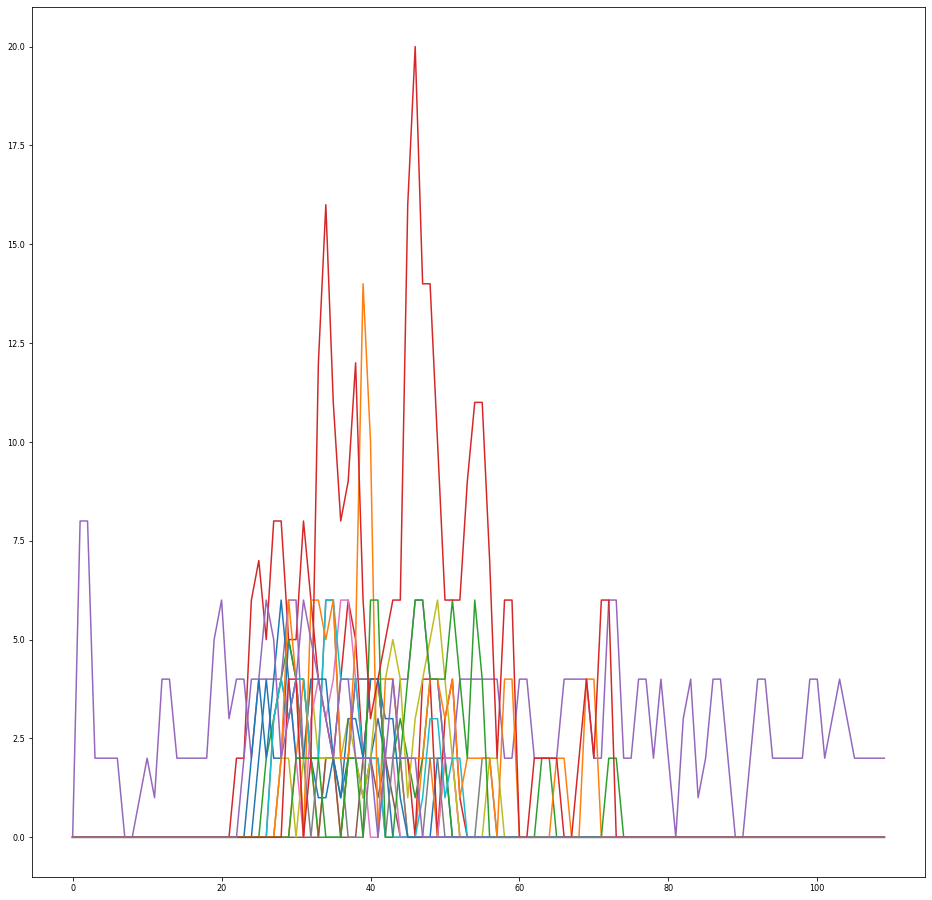

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_maxf(st):
    plt.figure(figsize=(16,16))
    N = len(st)
    for i, tr in enumerate(st):
        T = tr.stats.spectrogramdata.T
        F = tr.stats.spectrogramdata.F
        S = tr.stats.spectrogramdata.S
        maxS = np.nanmax(S)
        meanS = np.nanmean(S)
        print(maxS, meanS)
        S[S<maxS*0.1]=0
        max_f = []
        for T_index in range(len(T)):
            a = np.array(S[:, T_index])
            max_i = np.argmax(a)
            max_f.append(F[int(max_i)])
        plt.subplot(N, 1, i+1)
        plt.plot(T, max_f)
        #print(corrected_st[0].stats.spectrogramdata)
    plt.show()
    
plot_maxf(corrected_st)

def zero_crossings(st):
    plt.figure(figsize=(16,16))
    N = len(st)
    all_crossings = []
    for i, tr in enumerate(st):
        Fs = int(tr.stats.sampling_rate)
        window_length = int(1.0 * Fs) # 3 seconds
        y_all = tr.data
        y_max = max(y_all)
        y_all[y_all < y_max/tr.stats.metrics.snr] = 0
        l = len(y_all)
        crossings_per_second = []
        start_i = 0
        while start_i < l - window_length:
            y = y_all[start_i:start_i+window_length]
            pos = y > 0
            npos = ~pos
            crossings = ((pos[:-1] & npos[1:]) | (npos[:-1] & pos[1:])).nonzero()[0]
            lc = len(crossings)
            crossings_per_second.append(lc)
            start_i += int(window_length/2)
        #print(crossings_per_second)
        #plt.subplot(N, 1, i+1)
        plt.plot(crossings_per_second)
        #print(corrected_st[0].stats.spectrogramdata)
        all_crossings.append(crossings_per_second)
    plt.show()  
    return all_crossings
all_crossings = zero_crossings(corrected_st)
np.array(np.sum(all_crossings,0)/len(all_crossings),dtype='int')